<a href="https://colab.research.google.com/github/vbddinho/puc_minas_machine/blob/main/plano3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [25]:
df_estatisticas = pd.read_csv('dados/campeonato-brasileiro-estatisticas-full.csv', sep=',',encoding = "UTF-8")


In [26]:
df_estatisticas.nunique()

partida_id         8025
rodata               46
clube                45
chutes               37
chutes_no_alvo       16
posse_de_bola        62
passes              515
precisao_passes      42
faltas               32
cartao_amarelo       11
cartao_vermelho       4
impedimentos         11
escanteios           21
dtype: int64

In [27]:
df_estatisticas.rename(columns={'rodata':'rodada'},inplace=True)

In [28]:
df_estatisticas.isna().sum()

partida_id            0
rodada                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

In [29]:
df_estatisticas.fillna(0, axis=1, inplace=True)

In [30]:
df_jogos = pd.read_csv('dados/campeonato-brasileiro-full.csv',sep=',',encoding = "UTF-8")

In [31]:
df_jogos.isna().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [32]:
df_jogos.rename(columns={'ID':'partida_id'},inplace=True)
df_jogos.rename(columns={'rodata':'rodada'},inplace=True)

In [33]:
df = pd.merge(df_estatisticas,df_jogos,how='left',right_on='partida_id',left_on='partida_id')

In [34]:
df.columns

Index(['partida_id', 'rodada_x', 'clube', 'chutes', 'chutes_no_alvo', 'posse_de_bola', 'passes', 'precisao_passes', 'faltas', 'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios', 'rodada_y', 'data', 'hora', 'mandante', 'visitante', 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante', 'vencedor', 'arena', 'mandante_Placar', 'visitante_Placar', 'mandante_Estado', 'visitante_Estado'], dtype='object')

In [35]:
df.drop(columns=['rodada_y','hora','arena','visitante_Estado','mandante_Estado','tecnico_mandante','tecnico_visitante'],inplace=True)

In [36]:
df[(df['partida_id'] == 8023)].tail()

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_Placar,visitante_Placar
16044,8023,38,Corinthians,17,4,59%,494,84%,11,3,0,1,5,13/11/2022,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,Atletico-MG,0,1
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4,13/11/2022,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,Atletico-MG,0,1


In [37]:
#Converte a data do tipo objeto para o tipo datetime e cria a coluna ano
df["data"] = pd.to_datetime(df["data"],format='%d/%m/%Y',dayfirst=True)
df["ano"] = df["data"].dt.year


#temporada de 2020 e 2021 foi afetada pelo COVID-19, realizando ajuste
df.loc[(df["data"]>="2020/08/08") & (df["data"]<="2021/02/25"),"ano" ] = 2020
df.loc[(df["data"]>="2021/05/29") & (df["data"]<="2021/12/09"),"ano" ] = 2021
df.rename(columns={'ano':'temporada'},inplace=True)

In [38]:
#Validando alteração anterior
df[(df["temporada"]==2020)].data.unique()


array(['2020-08-08T00:00:00.000000000', '2020-08-09T00:00:00.000000000',
       '2020-08-12T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
       '2020-08-15T00:00:00.000000000', '2020-08-16T00:00:00.000000000',
       '2020-08-19T00:00:00.000000000', '2020-08-20T00:00:00.000000000',
       '2020-08-22T00:00:00.000000000', '2020-08-23T00:00:00.000000000',
       '2020-08-26T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-08-30T00:00:00.000000000', '2020-09-02T00:00:00.000000000',
       '2020-09-03T00:00:00.000000000', '2020-09-05T00:00:00.000000000',
       '2020-09-06T00:00:00.000000000', '2020-09-09T00:00:00.000000000',
       '2020-09-10T00:00:00.000000000', '2020-09-12T00:00:00.000000000',
       '2020-09-13T00:00:00.000000000', '2020-09-16T00:00:00.000000000',
       '2020-09-19T00:00:00.000000000', '2020-09-20T00:00:00.000000000',
       '2020-09-23T00:00:00.000000000', '2020-09-26T00:00:00.000000000',
       '2020-09-27T00:00:00.000000000', '2020-09-28

In [39]:
df.drop(columns=['data'],inplace=True)

In [40]:
df.vencedor.unique()

array(['Guarani', 'Athletico-PR', '-', 'Criciuma', 'Atletico-MG',
       'Internacional', 'Gremio', 'Flamengo', 'Vitoria', 'Ponte Preta',
       'Parana', 'Sao Caetano', 'Cruzeiro', 'Vasco', 'Paysandu', 'Santos',
       'Corinthians', 'Juventude', 'Bahia', 'Fluminense', 'Sao Paulo',
       'Fortaleza', 'Coritiba', 'Goias', 'Figueirense', 'Palmeiras',
       'Botafogo-RJ', 'Brasiliense', 'Santa Cruz', 'Sport', 'America-RN',
       'Nautico', 'Ipatinga', 'Portuguesa', 'Santo Andre', 'Barueri',
       'Avai', 'Ceara', 'Gremio Prudente', 'Atletico-GO', 'America-MG',
       'Chapecoense', 'Joinville', 'CSA', 'Bragantino', 'Cuiaba'],
      dtype=object)

In [41]:
# Cria a coluna vencedor para determinar se a linha analisada foi vitoria derrota ou empate
df.loc[(df['vencedor']==df['clube']),'vencedor'] = 'V'
df.loc[(df['vencedor']=='-'),'vencedor'] = 'E'
df.loc[(df['vencedor']!='V') & (df['vencedor']!='E'),'vencedor'] = 'D'


# Criação da coluna mv, representa se é Mandante ou Visitante
df.loc[(df['clube'] == df['mandante']),'mv'] = 'm'
df.loc[(df['clube'] == df['visitante']),'mv'] = 'v'

#Cria coluna de gols, e remove as colunas de mandante_placar e visitante_placar
df['gols'] = df.apply(lambda x: x['mandante_Placar'] if x['mv'] == 'm' else x['visitante_Placar'],axis=1)


df.rename(columns={"vencedor":"resultado"},inplace=True)
df.drop(columns=['mandante_Placar','visitante_Placar'],inplace=True)
df.drop(columns=['mandante','visitante'],inplace=True)

In [64]:
#Faço um filtro de temporada de analise, a partir de 2018 os dados são completos
df2018_2022 = df[(df["temporada"]>=2018)]
df2018_2022.to_csv("dados/df2018_2022.csv",index=False,sep=',')
df2018_2022.isna().sum()

partida_id            0
rodada_x              0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola         0
passes                0
precisao_passes       0
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
formacao_mandante     0
formacao_visitante    0
resultado             0
temporada             0
mv                    0
gols                  0
dtype: int64

In [65]:
df2018_2022.shape

(3800, 19)

In [45]:
partidas = df2018_2022.partida_id.nunique()
v_mandante = df2018_2022[(df2018_2022['resultado'] == 'V') & (df2018_2022['mv'] == 'm')].partida_id.nunique()
v_visitante = df2018_2022[(df2018_2022['resultado'] == 'V') & (df2018_2022['mv'] == 'v')].partida_id.nunique()
empate = df2018_2022[(df2018_2022['resultado'] == 'E') & (df2018_2022['mv'] == 'm')].partida_id.nunique()
print("####################################")
print(" ")
print("Total de Partidas:", str(partidas))
print("Vitorias Mandante:", str(v_mandante))
print("Vitorias Visitante:", str(v_visitante))
print("Empate:", str(empate))
print(" ")
print("####################################")




####################################
 
Total de Partidas: 1900
Vitorias Mandante: 899
Vitorias Visitante: 464
Empate: 537
 
####################################


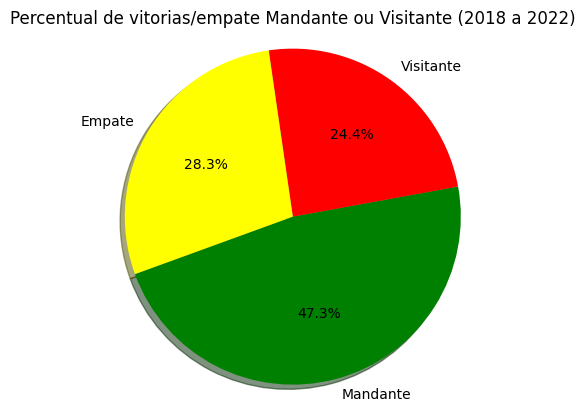

In [46]:
label = ["Mandante","Visitante","Empate"]
sizes = [v_mandante,v_visitante,empate]
#fonte : https://medium.com/horadecodar/gr%C3%A1ficos-de-pizza-com-matplotlib-piechart-33ea9760ad87
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=200,colors=["green","red","yellow"])
ax1.set_title("Percentual de vitorias/empate Mandante ou Visitante (2018 a 2022)")
ax1.axis('equal')
plt.show()

In [47]:
# Resultado de qtd de partidas visitantes ou mandantes que terminaram em derrota empate ou vitoria
qtd_partida_vitoria  = pd.DataFrame(df2018_2022[(df2018_2022['resultado']=="V" )].groupby([df2018_2022['temporada'], df2018_2022['mv']]).agg({'partida_id': 'count'})).reset_index()
qtd_partida_empate  = pd.DataFrame(df2018_2022[(df2018_2022['resultado']=="E" )].groupby([df2018_2022['temporada'], df2018_2022['mv']]).agg({'partida_id': 'count'})).reset_index()
qtd_partida_vitoria

,temporada,mv,partida_id
0,2018,m,202
1,2018,v,68
2,2019,m,184
3,2019,v,98
4,2020,m,171
5,2020,v,101
6,2021,m,174
7,2021,v,93
8,2022,m,168
9,2022,v,104


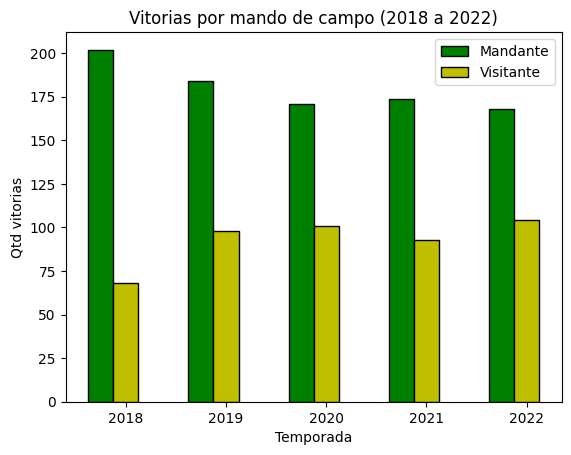

In [48]:
vit_m = qtd_partida_vitoria[(qtd_partida_vitoria["mv"] == "m")]["partida_id"]
vit_v = qtd_partida_vitoria[(qtd_partida_vitoria["mv"] == "v")]["partida_id"]

n=5
r = np.arange(n)
width = 0.25

plt.bar(r, vit_m, color = 'g',
        width = width, edgecolor = 'black',
        label='Mandante')
plt.bar(r + width, vit_v, color = 'y',
        width = width, edgecolor = 'black',
        label='Visitante')
  
plt.xlabel("Temporada")
plt.ylabel("Qtd vitorias")
plt.title("Vitorias por mando de campo (2018 a 2022)")
plt.xticks(r + width,['2018','2019','2020','2021','2022'])
plt.legend()
plt.show()

In [62]:
df2018_2022.tail(20)

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,formacao_mandante,formacao_visitante,resultado,temporada,mv,gols
16030,8016,38,Flamengo,17,4,66%,579,91%,14,0,0,1,10,4-3-3,4-5-1,D,2022,m,1
16031,8016,38,Avai,15,8,34%,313,81%,11,1,0,0,3,4-3-3,4-5-1,V,2022,v,2
16032,8017,38,Athletico-PR,25,10,40%,271,75%,19,1,0,2,6,4-1-4-1,4-2-3-1,V,2022,m,3
16033,8017,38,Botafogo-RJ,9,4,60%,415,83%,13,1,0,0,3,4-1-4-1,4-2-3-1,D,2022,v,0
16034,8018,38,Ceara,22,9,62%,467,84%,16,4,0,1,8,4-2-3-1,4-1-2-1-2,V,2022,m,4
16035,8018,38,Juventude,9,4,38%,297,76%,16,4,0,0,3,4-2-3-1,4-1-2-1-2,D,2022,v,1
16036,8019,38,America-MG,36,9,60%,420,82%,14,3,0,0,17,4-3-3,4-2-3-1,E,2022,m,1
16037,8019,38,Atletico-GO,4,3,40%,319,73%,12,2,1,3,5,4-3-3,4-2-3-1,E,2022,v,1
16038,8020,38,Santos,14,3,47%,361,78%,17,1,0,0,5,4-2-3-1,4-4-2,D,2022,m,0
16039,8020,38,Fortaleza,13,6,53%,396,79%,14,3,0,2,7,4-2-3-1,4-4-2,V,2022,v,2


In [50]:
df2018_2022[(df2018_2022['resultado']=="V" ) & (df2018_2022['mv'] == 'm')].chutes_no_alvo.sum()

4962

In [57]:
#chutes no alvo por mando de campo
df2018_2022.groupby([df2018_2022['temporada'],df2018_2022['mv'], df2018_2022['resultado']]).agg({'chutes_no_alvo': 'sum'}).reset_index()

,temporada,mv,resultado,chutes_no_alvo
0,2018,m,D,261
1,2018,m,E,432
2,2018,m,V,1061
3,2018,v,D,602
4,2018,v,E,367
5,2018,v,V,309
6,2019,m,D,387
7,2019,m,E,422
8,2019,m,V,1050
9,2019,v,D,562


In [ ]:
#medias de chutes para uma vitoria em Mandantes e VisitantesS
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'passes': 'sum'}).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'chutes': 'sum'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Soma de CHUTES em partidas Mandante/Visitante", fontsize=20)
ax.set_ylabel("Qtd chutes ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'chutes_no_alvo': 'sum'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Soma de chutes_no_alvo em partidas Mandante/Visitante", fontsize=20)
ax.set_ylabel("Qtd chutes_no_alvo ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

In [ ]:
df2018_2022['chutes'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['chutes_no_alvo'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['posse_de_bola'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['passes'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['precisao_passes'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['faltas'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['cartao_amarelo'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['cartao_vermelho'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['impedimentos'] = df2018_2022['chutes'].astype('Int64')
df2018_2022['escanteios'] = df2018_2022['chutes'].astype('Int64')

In [ ]:
df2018_2022.info()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby([df2018_2022['mv'], df2018_2022['resultado']]).agg({'passes': 'sum'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Soma de PASSES em partidas Mandante/Visitante", fontsize=20)
ax.set_ylabel("Qtd passes ", fontsize=13);
ax.set_xlabel("Mandante/Visitante", fontsize=13);
plt.show()

In [ ]:
def media_chutes_alvo_gol(row):
    if (row['gols'] == 0 ):
        return 0
    else:
        row["chutes_no_alvo"] / row['gols']

df2018_2022['media_chutes_alvo_gol'] = df2018_2022.apply(lambda x : 0 if x['gols'] == 0 else x["chutes_no_alvo"] / x['gols'] ,axis=1)

In [ ]:
df2018_2022[['temporada','mv','chutes_no_alvo', 'gols','media_chutes_alvo_gol' ]].tail()


In [ ]:
#df2018_2022.groupby([df2018_2022['temporada'],df2018_2022['mv']]).agg({"media_chutes_alvo_gol": "sum",})
fig, ax = plt.subplots(figsize=(10,5))
df2018_2022.groupby("temporada").agg({'gols':'sum'}).unstack().plot(kind="bar", ax=ax)
ax.set_alpha(0.8)
ax.set_title("Gols por temporada", fontsize=20)
ax.set_ylabel("Qtd Gols ", fontsize=13);
ax.set_xlabel("Ano", fontsize=13);
plt.show()